<a href="https://colab.research.google.com/github/Aditya-Walia1/Stock-Price-Prediction/blob/main/Multi_Layer_Perceptron_(MLP)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Multi-Layer Perceptron (MLP)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten


In [ ]:

# Load the dataset
file_path = '/content/AMZN.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000


In [ ]:

# Select the 'Close' column
close_prices = data['Close'].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
close_prices_scaled = scaler.fit_transform(close_prices.reshape(-1, 1))


In [ ]:
close_prices_scaled

array([[1.50803720e-04],
       [8.93615930e-05],
       [8.37798446e-05],
       ...,
       [5.48739012e-01],
       [5.56996316e-01],
       [5.41714877e-01]])

In [ ]:

# Create sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)


In [ ]:

# Define the sequence length
seq_length = 60

# Create sequences
X, y = create_sequences(close_prices_scaled, seq_length)

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Reshape data for MLP
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1])


In [ ]:

# Define the MLP model
model = Sequential()
model.add(Dense(128, input_dim=seq_length, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           7,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,177 (71.00 KB)

 Trainable params: 18,177 (71.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.1)



Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 4.6118e-04 - val_loss: 1.0605e-04
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1018e-05 - val_loss: 1.1168e-04
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.2491e-06 - val_loss: 1.9372e-04
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.6354e-06 - val_loss: 1.7620e-04
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.5056e-06 - val_loss: 1.0457e-04
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.8724e-06 - val_loss: 6.0848e-05
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9802e-06 - val_loss: 9.5940e-05
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.6552e-06 - val_loss: 3.3985e-05
Epoch 9/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.5470e-06 - val_loss: 3.3302e-05
Epoch 10/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.6344e-06 - val_loss: 9.6457e-05
Epoch 11/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss

In [ ]:

# Evaluate the model on the test set
loss = model.evaluate(X_test_reshaped, y_test)
print(f'Test Loss: {loss}')

# Make predictions
predictions = model.predict(X_test_reshaped)

# Inverse transform the predictions and true values to get the original scale
predictions_inverse = scaler.inverse_transform(predictions)
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5058e-04
Test Loss: 0.0003948532394133508
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


RMSE: 3.705939720203097
MAE: 2.7566526335498347
MAPE: 2.3316190405255774


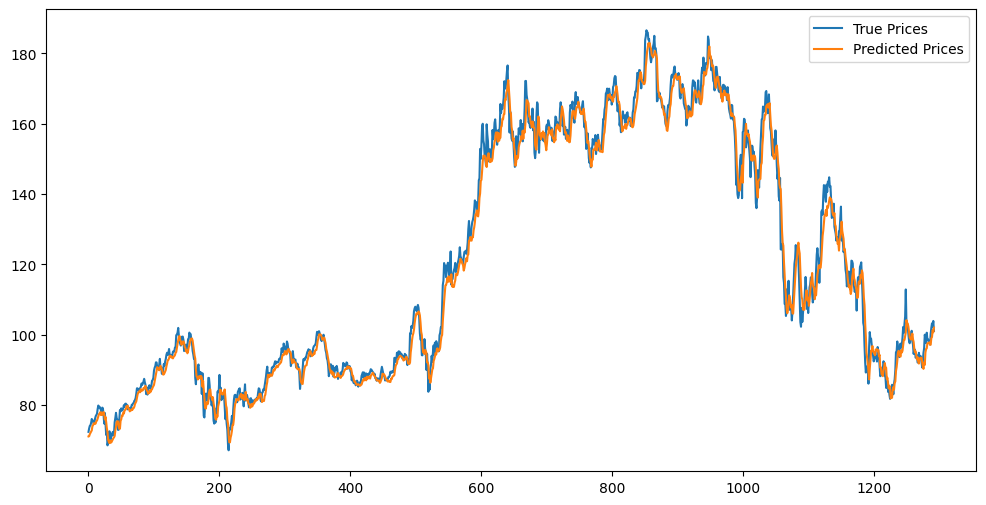

In [ ]:

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_inverse, predictions_inverse))
print(f'RMSE: {rmse}')

# Calculate MAE
mae = mean_absolute_error(y_test_inverse, predictions_inverse)
print(f'MAE: {mae}')

# Calculate MAPE
mape = np.mean(np.abs((y_test_inverse - predictions_inverse) / y_test_inverse)) * 100
print(f'MAPE: {mape}')

# Plot the predictions against the true values
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse, label='True Prices')
plt.plot(predictions_inverse, label='Predicted Prices')
plt.legend()
plt.show()
